In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
london_data = pd.read_csv('london_weather_data_1979_to_2023.csv')

In [3]:
london_data
# Date in YYYYMMDD format
# TX: Daily maximum temperature in 0.1°C.
# TN: Daily minimum temperature in 0.1°C.
# TG: Daily mean temperature in 0.1°C.
# SS: Daily sunshine duration in 0.1 hours.
# SD: Daily snow depth in 1 cm.
# RR: Daily precipitation amount in 0.1 mm.
# QQ: Daily global radiation in W/m².
# PP: Daily sea level pressure in 0.1 hPa.
# HU: Daily relative humidity in %.
# CC: Daily cloud cover in oktas.
# Q: 0 is valid, 1 is suspect data, 9 is missing data.

DATE     TX  Q_TX    TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
0      19790101   23.0     0 -75.0     0  -41.0     0  70.0     0  9.0  ...   
1      19790102   16.0     0 -75.0     0  -26.0     0  17.0     0  8.0  ...   
2      19790103   13.0     0 -72.0     0  -28.0     0   0.0     0  4.0  ...   
3      19790104   -3.0     0 -65.0     0  -26.0     0   0.0     0  2.0  ...   
4      19790105   56.0     0 -14.0     0   -8.0     0  20.0     0  1.0  ...   
...         ...    ...   ...   ...   ...    ...   ...   ...   ...  ...  ...   
16431  20231227  126.0     0  55.0     0   89.0     0   0.0     0  0.0  ...   
16432  20231228  119.0     0  97.0     0  112.0     0   2.0     0  0.0  ...   
16433  20231229  122.0     0  92.0     0  106.0     0   7.0     0  0.0  ...   
16434  20231230  107.0     0  56.0     0   89.0     0   0.0     0  0.0  ...   
16435  20231231  124.0     0  57.0     0   82.0     0   5.0     0  0.0  ...   

         RR  Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
0       4.0     0  52.0     0  10190.0     0  83.0     0  2.0     0  
1       0.0     0  27.0     0  10253.0     0  76.0     0  6.0     0  
2       0.0     0  13.0     0  10205.0     0  86.0     0  5.0     0  
3       0.0     0  13.0     0  10084.0     0  68.0     0  8.0     0  
4       0.0     0  29.0     0  10225.0     0  73.0     0  6.0     0  
...     ...   ...   ...   ...      ...   ...   ...   ...  ...   ...  
16431  46.0     0  12.0     0  10067.0     0  89.0     0  8.0     0  
16432  48.0     0  15.0     0  10051.0     0  81.0     0  7.0     0  
16433   0.0     0  20.0     0  10071.0     0  78.0     0  6.0     0  
16434  56.0     0  12.0     0  10046.0     0  87.0     0  7.0     0  
16435  16.0     0  18.0     0   9891.0     0  85.0     0  7.0     0  

[16436 rows x 21 columns]

In [4]:
london_data.info()
# Aparent missing values on columns TG, SD, QQ, PP, HU, CC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [5]:
MASK_Q_TG = london_data['Q_TG'] != 9
# Missing values on columns are typically Nan. With the apropriate mask, there can be ignored (or imputed, if desired). Also, measures can be done with
# the use of pandas mean, who automatically ignores NaN values.
london_data['TG'][MASK_Q_TG]

0        -41.0
1        -26.0
2        -28.0
3        -26.0
4         -8.0
         ...  
16431     89.0
16432    112.0
16433    106.0
16434     89.0
16435     82.0
Name: TG, Length: 16407, dtype: float64

In [6]:
london_data['DATE'] = pd.to_datetime(london_data['DATE'], format='%Y%m%d')
london_data_filtered = london_data.copy()#.dropna()
london_data_filtered.loc[:, 'TX'] = london_data_filtered['TX'] / 10.0 # Convert to Celsius
london_data_filtered.loc[:, 'TN'] = london_data_filtered['TN'] / 10.0 
london_data_filtered.loc[:, 'TG'] = london_data_filtered['TG'] / 10.0 

london_data_filtered.loc[:, 'SS'] = london_data_filtered['SS'] / 10.0 
# london_data_filtered.loc[:, 'PP'] = london_data_filtered['PP'] / 100.0 
london_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16436 non-null  datetime64[ns]
 1   TX      16436 non-null  float64       
 2   Q_TX    16436 non-null  int64         
 3   TN      16436 non-null  float64       
 4   Q_TN    16436 non-null  int64         
 5   TG      16407 non-null  float64       
 6   Q_TG    16436 non-null  int64         
 7   SS      16436 non-null  float64       
 8   Q_SS    16436 non-null  int64         
 9   SD      15361 non-null  float64       
 10  Q_SD    16436 non-null  int64         
 11  RR      16436 non-null  float64       
 12  Q_RR    16436 non-null  int64         
 13  QQ      16411 non-null  float64       
 14  Q_QQ    16436 non-null  int64         
 15  PP      16432 non-null  float64       
 16  Q_PP    16436 non-null  int64         
 17  HU      16379 non-null  float64       
 18  Q_HU  

In [7]:
london_data_filtered.set_index('DATE', inplace=True)
# Average temperature by year
annual_mean_temp = london_data_filtered['TG'].resample('YE').mean()
annual_max_temp = london_data_filtered['TX'].resample('YE').mean()
annual_min_temp = london_data_filtered['TN'].resample('YE').mean()
sunshine_duration_yearly = london_data_filtered['SS'].resample('YE').mean()


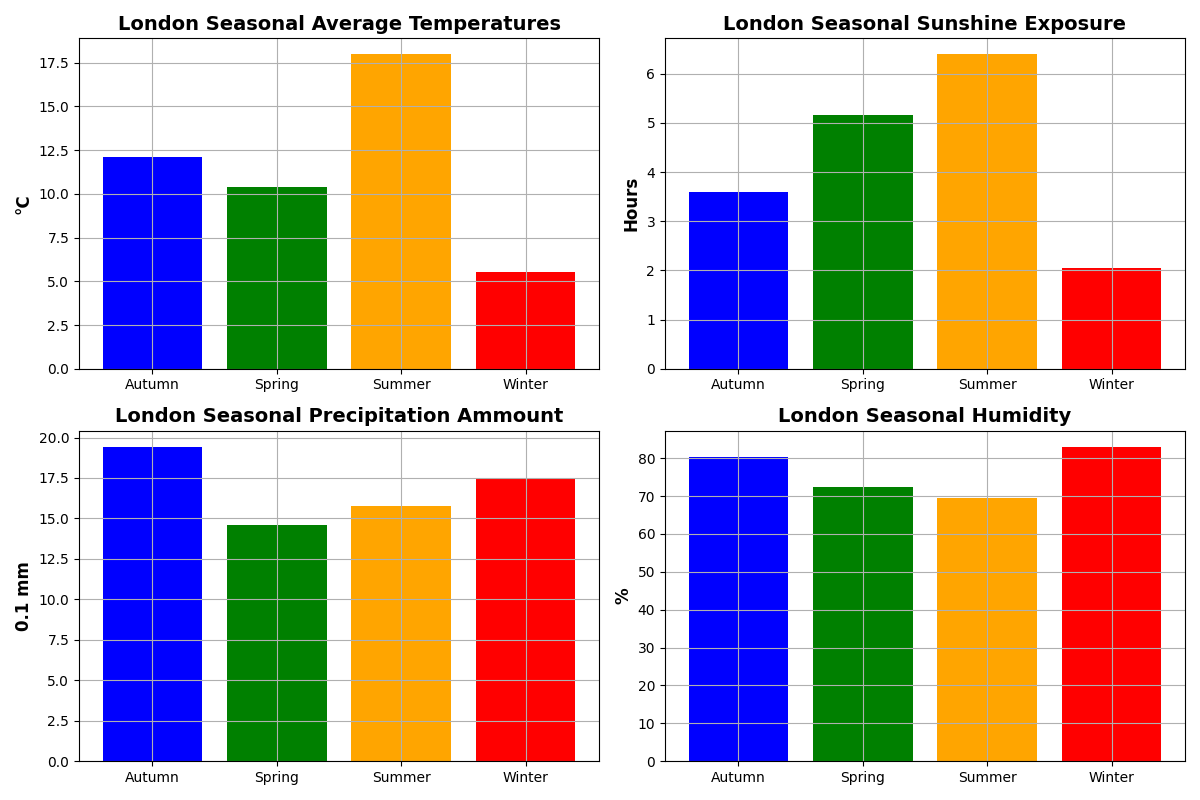

In [8]:
london_data_filtered['Month'] = london_data_filtered.index.month

london_data_filtered['Season'] = london_data_filtered['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

seasonal_mean_temp = london_data_filtered.groupby('Season')['TG'].mean()
colors = ['blue', 'green', 'orange', 'red']

seasonal_mean_sunshine = london_data_filtered.groupby('Season')['SS'].mean()

seasonal_mean_precipitation_ammount = london_data_filtered.groupby('Season')['RR'].mean()

seasonal_mean_sea_level_pressure = london_data_filtered.groupby('Season')['HU'].mean()


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.bar(seasonal_mean_temp.index, seasonal_mean_temp, color=colors)
plt.title('London Seasonal Average Temperatures', fontsize=14, fontweight='bold')
plt.ylabel('°C', fontsize=12, fontweight='bold')
plt.grid()
plt.subplot(2, 2, 2)
plt.bar(seasonal_mean_sunshine.index, seasonal_mean_sunshine, color=colors)
plt.title('London Seasonal Sunshine Exposure', fontsize=14, fontweight='bold')
plt.ylabel('Hours', fontsize=12, fontweight='bold')
plt.grid()
plt.subplot(2, 2, 3)
plt.bar(seasonal_mean_precipitation_ammount.index, seasonal_mean_precipitation_ammount, color=colors)
plt.title('London Seasonal Precipitation Ammount', fontsize=14, fontweight='bold')
plt.ylabel('0.1 mm', fontsize=12, fontweight='bold')
plt.grid()
plt.subplot(2, 2, 4)
plt.bar(seasonal_mean_sea_level_pressure.index, seasonal_mean_sea_level_pressure, color=colors)
plt.title('London Seasonal Humidity', fontsize=14, fontweight='bold')
plt.ylabel('%', fontsize=12, fontweight='bold')
plt.grid()

plt.tight_layout()
plt.show()


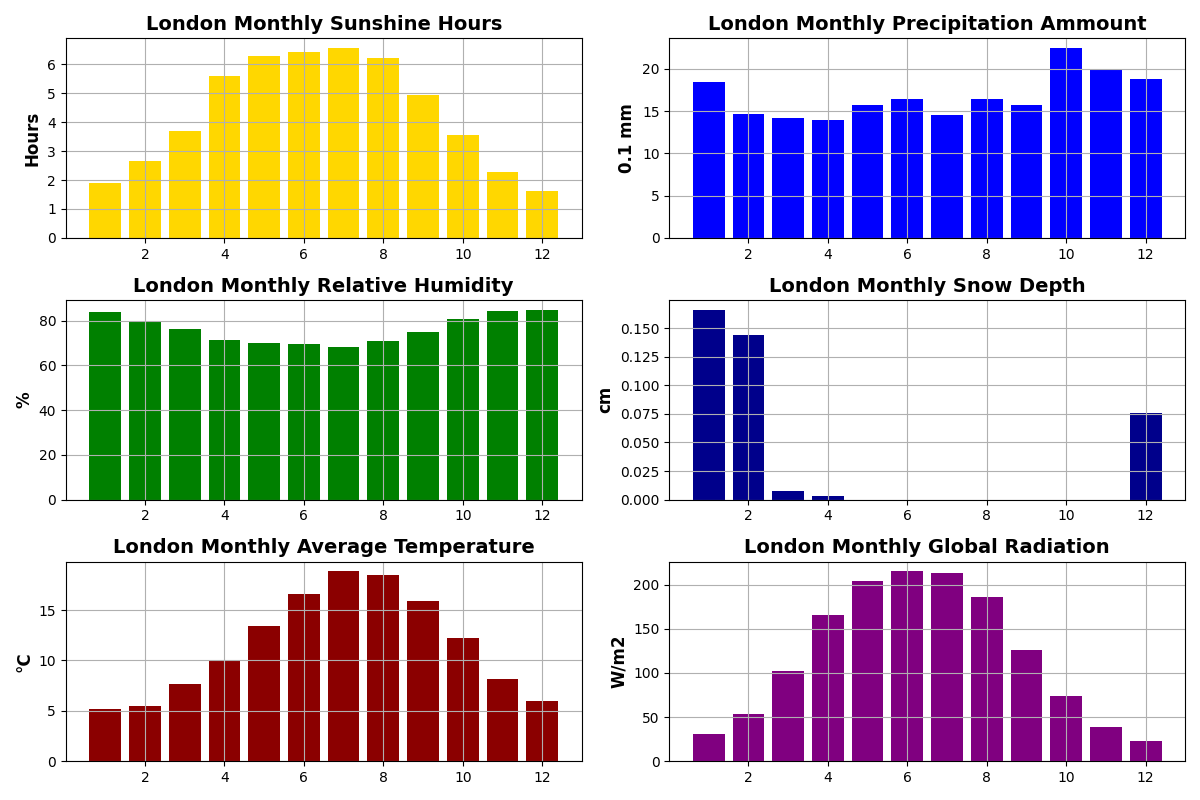

In [9]:
monthly_mean_avg_temp = london_data_filtered.groupby('Month')['TG'].mean()
monthly_mean_sunshine = london_data_filtered.groupby('Month')['SS'].mean()
monthly_mean_rains = london_data_filtered.groupby('Month')['RR'].mean()
monthly_mean_snow_depth = london_data_filtered.groupby('Month')['SD'].mean()
monthly_mean_relative_humidity = london_data_filtered.groupby('Month')['HU'].mean()
monthly_mean_global_radiation = london_data_filtered.groupby('Month')['QQ'].mean()

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt.subplot(3,2, 1)
plt.bar(monthly_mean_sunshine.index, monthly_mean_sunshine, color='gold')
plt.title('London Monthly Sunshine Hours', fontsize=14, fontweight='bold')
plt.ylabel('Hours', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(3,2, 2)
plt.bar(monthly_mean_rains.index, monthly_mean_rains, color='blue')
plt.title('London Monthly Precipitation Ammount', fontsize=14, fontweight='bold')
plt.ylabel('0.1 mm', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(3,2, 3)
plt.bar(monthly_mean_relative_humidity.index, monthly_mean_relative_humidity, color='green')
plt.title('London Monthly Relative Humidity', fontsize=14, fontweight='bold')
plt.ylabel('%', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(3,2, 4)
plt.bar(monthly_mean_snow_depth.index, monthly_mean_snow_depth, color='darkblue')
plt.title('London Monthly Snow Depth', fontsize=14, fontweight='bold')
plt.ylabel('cm', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(3,2, 5)
plt.bar(monthly_mean_avg_temp.index, monthly_mean_avg_temp, color='darkred')
plt.title('London Monthly Average Temperature', fontsize=14, fontweight='bold')
plt.ylabel('°C', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(3,2, 6)
plt.bar(monthly_mean_global_radiation.index, monthly_mean_global_radiation, color='purple')
plt.title('London Monthly Global Radiation', fontsize=14, fontweight='bold')
plt.ylabel('W/m2', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.show()

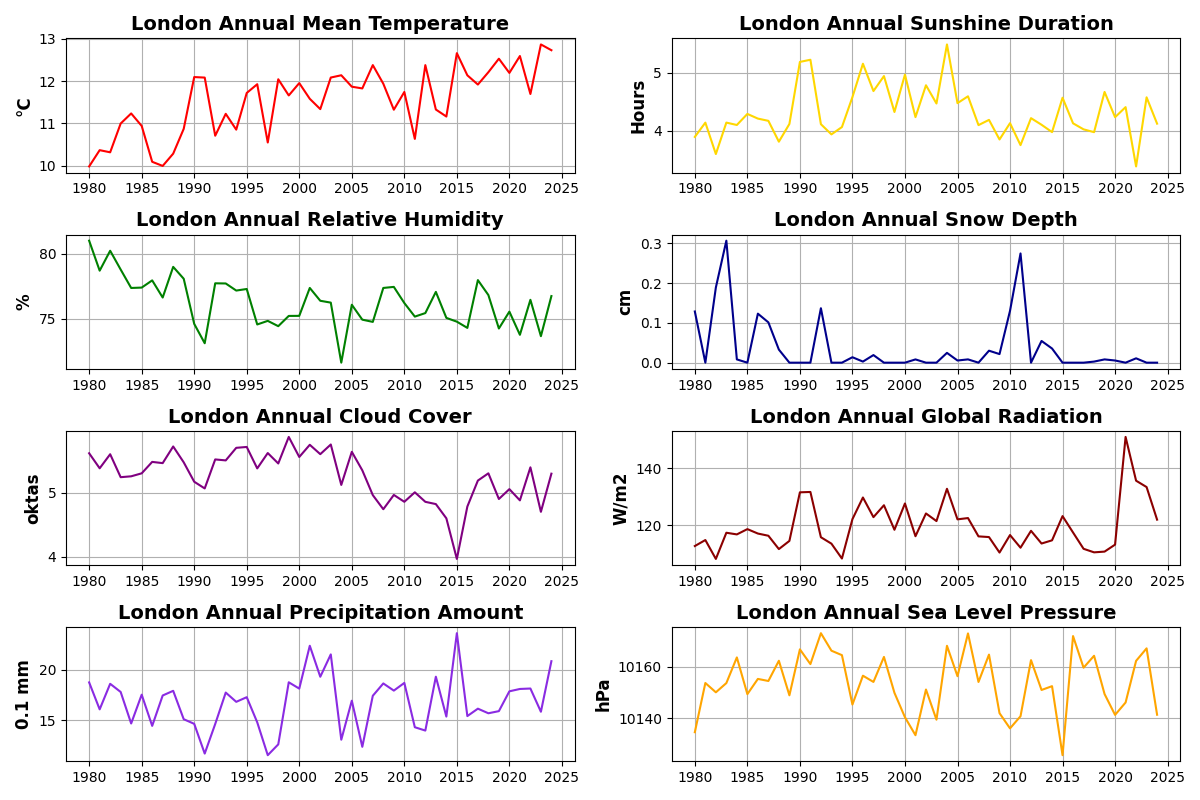

In [10]:
precipitation_yearly = london_data_filtered['RR'].resample('YE').mean()
snow_depth_yearly = london_data_filtered['SD'].resample('YE').mean()
global_radiation_yearly = london_data_filtered['QQ'].resample('YE').mean()
sea_level_pressure_yearly = london_data_filtered['PP'].resample('YE').mean()
relative_humidity_yearly = london_data_filtered['HU'].resample('YE').mean()
cloud_cover_yearly = london_data_filtered['CC'].resample('YE').mean()

fig, axes = plt.subplots(4, 2, figsize=(12, 8))
plt.subplot(4,2, 1)
plt.plot(annual_mean_temp, color='red')
plt.title('London Annual Mean Temperature', fontsize=14, fontweight='bold')
plt.ylabel('°C', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 2)
plt.plot(sunshine_duration_yearly,color='gold')
plt.title('London Annual Sunshine Duration', fontsize=14, fontweight='bold')
plt.ylabel('Hours', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 3)
plt.plot(relative_humidity_yearly, color='green')
plt.title('London Annual Relative Humidity', fontsize=14, fontweight='bold')
plt.ylabel('%', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 4)
plt.plot(snow_depth_yearly, color='darkblue')
plt.title('London Annual Snow Depth', fontsize=14, fontweight='bold')
plt.ylabel('cm', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 5)
plt.plot(cloud_cover_yearly, color='purple')
plt.title('London Annual Cloud Cover', fontsize=14, fontweight='bold')
plt.ylabel('oktas', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 6)
plt.plot(global_radiation_yearly, color='darkred')
plt.title('London Annual Global Radiation', fontsize=14, fontweight='bold')
plt.ylabel('W/m2', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 7)
plt.plot(precipitation_yearly, color='blueviolet')
plt.title('London Annual Precipitation Amount', fontsize=14, fontweight='bold')
plt.ylabel('0.1 mm', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.subplot(4,2, 8)
plt.plot(sea_level_pressure_yearly, color='orange')
plt.title('London Annual Sea Level Pressure', fontsize=14, fontweight='bold')
plt.ylabel('hPa', fontsize=12, fontweight='bold')
plt.grid()
plt.tight_layout()

plt.show()

In [11]:
import seaborn as sns
import matplotlib.gridspec as gridspec

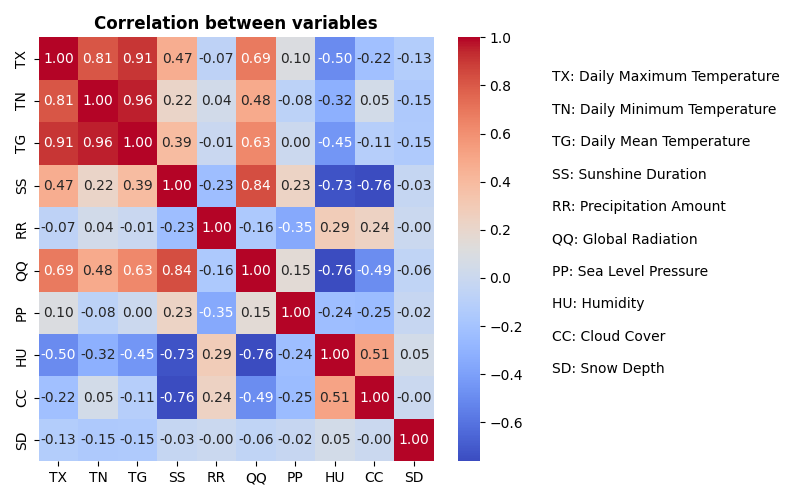

In [12]:
CORR_MATRIX = london_data_filtered[['TX', 'TN', 'TG', 'SS', 'RR', 'QQ', 'PP', 'HU', 'CC', 'SD']].corr()

plt.figure(figsize = (8,5))
sns.heatmap(CORR_MATRIX, cmap = 'coolwarm', fmt= '.2f', annot = True)
plt.title("Correlation between variables", fontweight = 'bold', fontsize = 12)
plt.text(13, 4, """
                \nTX: Daily Maximum Temperature
                \nTN: Daily Minimum Temperature
                \nTG: Daily Mean Temperature
                \nSS: Sunshine Duration
                \nRR: Precipitation Amount
                \nQQ: Global Radiation
                \nPP: Sea Level Pressure
                \nHU: Humidity
                \nCC: Cloud Cover
                \nSD: Snow Depth""", 
                fontsize=10, color='black', ha='left', va='center')
plt.tight_layout()
plt.show()

In [13]:
import plotly.graph_objects as go

In [14]:
hover_text = [
    f"Date: {dt}<br>"
    f"Avg: {init}<br>"
    f"Max: {maxi}<br>"
    f"Min: {mini}"
    for dt, init, maxi, mini in zip(
        london_data_filtered['TX'].index.date, london_data_filtered['TG'], london_data_filtered['TX'], london_data_filtered['TN']
    )
]

fig1 = go.Figure(data=[go.Candlestick(x=london_data_filtered.index,
                open=london_data_filtered['TG'], high=london_data_filtered['TX'],
                low=london_data_filtered['TN'], close=london_data_filtered['TG'],
                customdata=london_data_filtered[['TG', 'TG', 'TX', 'TN']].values,
                increasing_line_color='darkred', 
                decreasing_line_color='blue',
                hovertext=hover_text, 
                hoverinfo="text"
                )])

fig1.update_layout(title="London Daily Temperatures ( 1979 - 2024 )",
    xaxis_title="Date",
    yaxis_title="Temperature (°C)",
    template="plotly_white",
    xaxis_rangeslider_visible=False)
fig1.show()

In [15]:
hover_text = [
    f"Year: {dt}<br>"
    f"Avg: {init:.2f}<br>"
    f"Max: {maxi:.2f}<br>"
    f"Min: {mini:.2f}"
    for dt, init, maxi, mini in zip(
        annual_min_temp.index.year, annual_mean_temp, annual_max_temp, annual_min_temp 
    )
]

fig2 = go.Figure(data=[go.Candlestick(x=annual_min_temp.index.year,
                open=annual_mean_temp, high=annual_max_temp,
                low=annual_min_temp, close=annual_mean_temp,
                customdata=[[annual_mean_temp, annual_mean_temp, annual_max_temp, annual_min_temp]],
                increasing_line_color='darkred', 
                decreasing_line_color='blue',
                hovertext=hover_text, 
                hoverinfo="text"
                )])

# Highlight mean value from desired years for comparison
year_init = 1979
year_fin = 2000
mean_between_years =  annual_mean_temp[(annual_mean_temp.index.year >= year_init) & (annual_mean_temp.index.year <= year_fin)].mean()

fig2.add_trace(go.Scatter(
    x=annual_min_temp.index.year,                    
    y=[mean_between_years] * len(annual_min_temp.index),         
    mode='lines',                   
    line=dict(color='green', dash='dash'), 
    name=f"""Avg °C: {year_init}-{year_fin}"""             
))

fig2.update_layout(title="London Yearly Temperatures ( 1979 - 2024 )",
    xaxis_title="Date",
    yaxis_title="Temperature (°C)",
    template="plotly_white",
    xaxis_rangeslider_visible=False)
fig2.show()

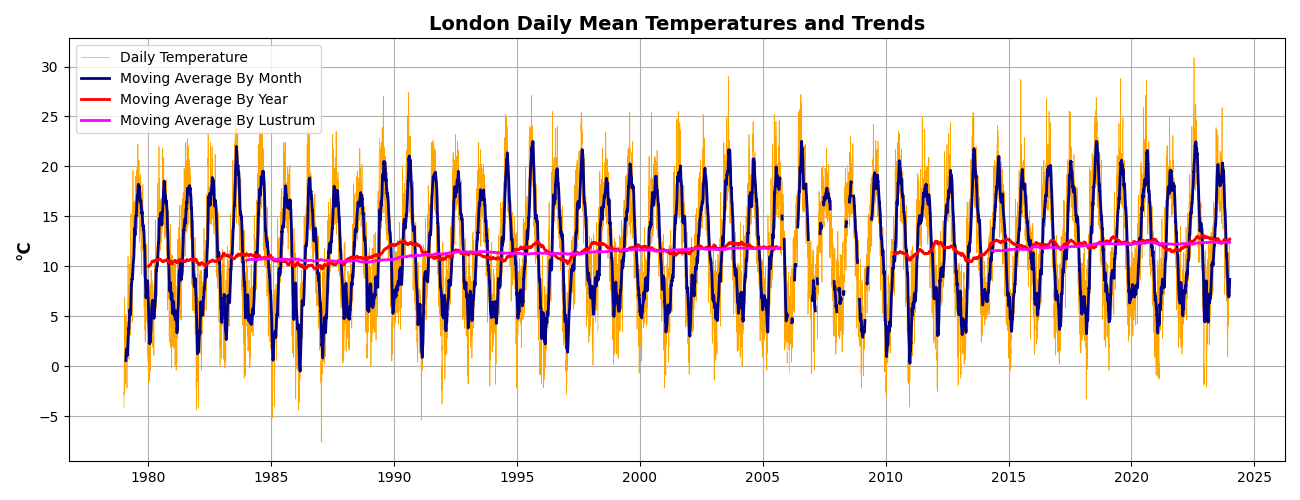

In [16]:
plt.figure(figsize=(13, 5))

london_data_filtered['moving_average_monthly_TG'] = london_data_filtered['TG'].rolling(window=30).mean()
london_data_filtered['moving_average_yearly_TG'] = london_data_filtered['TG'].rolling(window=365).mean()

london_data_filtered['moving_average_by_lustrum_TG'] = london_data_filtered['TG'].rolling(window=1825).mean()
plt.plot(london_data_filtered['TG'], color = 'orange', linewidth = '0.5', label = 'Daily Temperature')
plt.plot(london_data_filtered['moving_average_monthly_TG'], color = 'darkblue', linewidth = '2', label = 'Moving Average By Month')
plt.plot(london_data_filtered['moving_average_yearly_TG'], color = 'red', linewidth = '2', label = 'Moving Average By Year')
plt.plot(london_data_filtered['moving_average_by_lustrum_TG'], color = 'magenta', linewidth = '2', label = 'Moving Average By Lustrum')

plt.title('London Daily Mean Temperatures and Trends', fontsize=14, fontweight='bold')
plt.legend()
plt.ylabel('°C', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.grid()

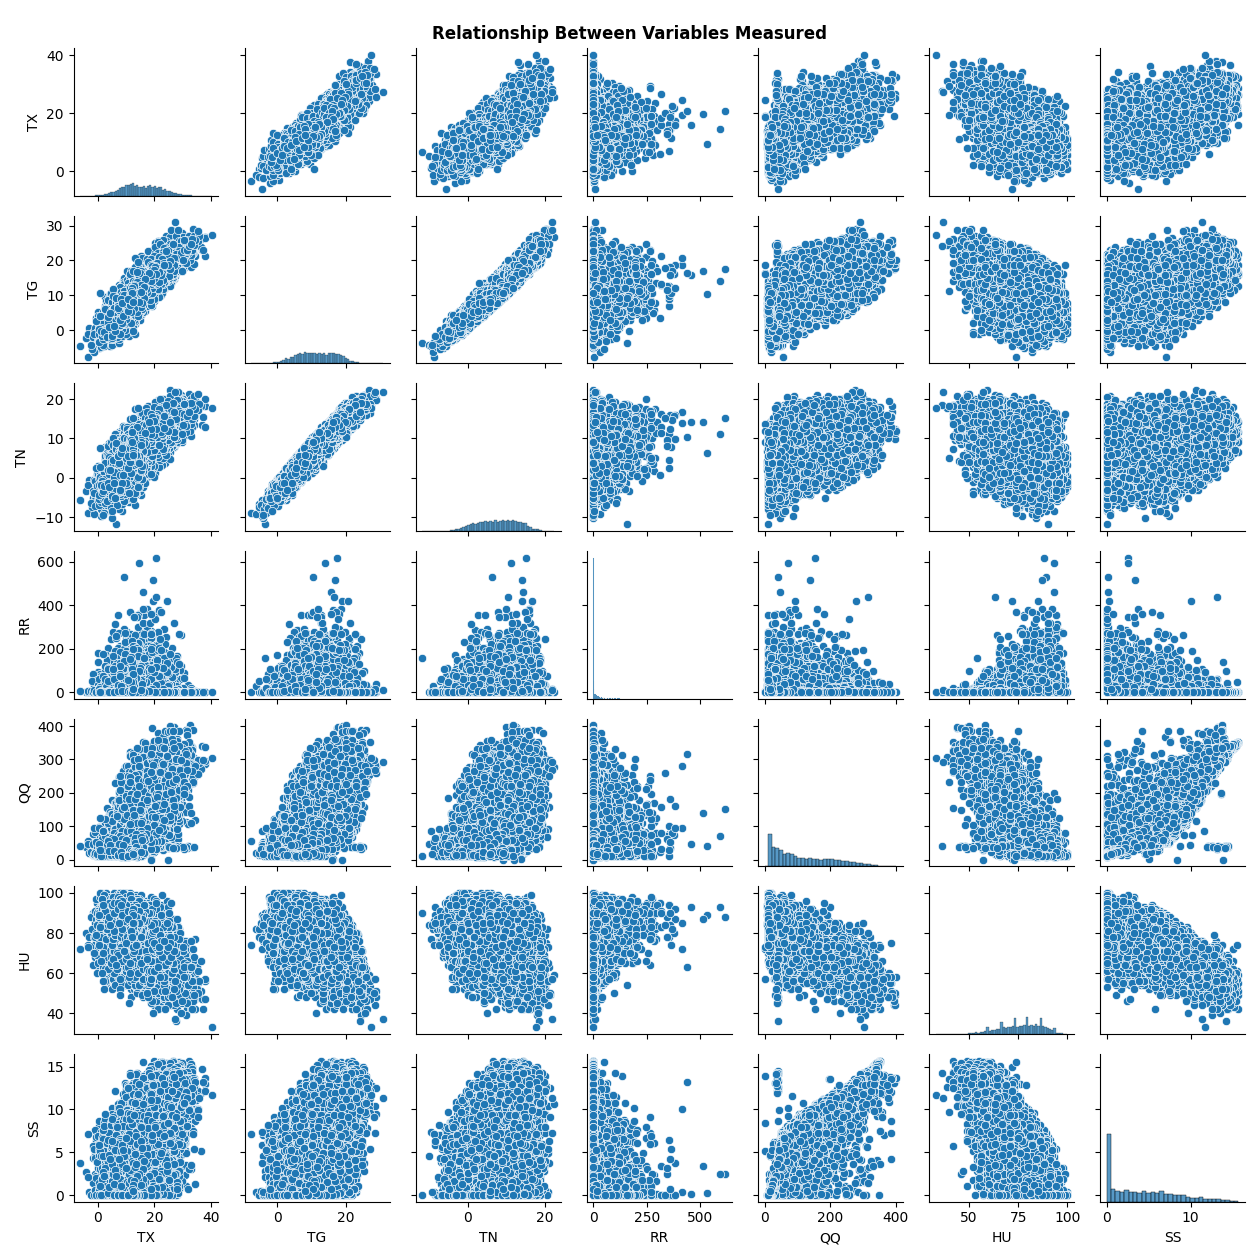

In [17]:
g = sns.pairplot(london_data_filtered, vars=['TX', 'TG', 'TN', 'RR','QQ','HU', 'SS'], height=1.8)
g.figure.suptitle("Relationship Between Variables Measured", weight = 'bold')
plt.tight_layout()
plt.show()

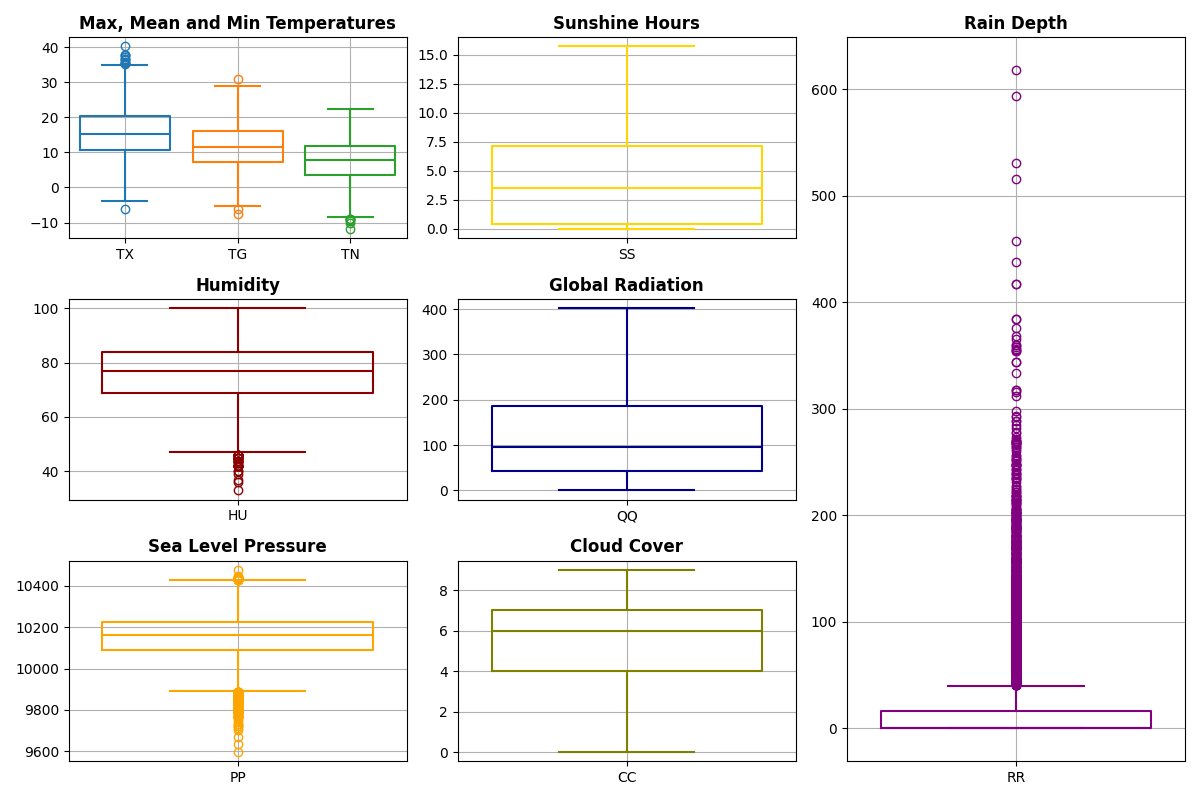

In [18]:
# Outliers in Data
fig  = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(3, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=london_data_filtered[['TX', 'TG','TN']], fill = False)
ax1.set_title('Max, Mean and Min Temperatures', weight = 'bold')
ax1.grid()

ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=london_data_filtered[['SS']], fill = False, color = 'gold')
ax2.set_title('Sunshine Hours', weight = 'bold')
ax2.grid()

ax3 = fig.add_subplot(gs[:, 2])
sns.boxplot(data=london_data_filtered[['RR']], fill = False, color = 'purple')
ax3.set_title('Rain Depth', weight = 'bold')
ax3.grid()

ax4 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=london_data_filtered[['HU']], fill = False, color = 'darkred')
ax4.set_title('Humidity', weight = 'bold')
ax4.grid()

ax5 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=london_data_filtered[['QQ']], fill = False, color = 'darkblue')
ax5.set_title('Global Radiation', weight = 'bold')
ax5.grid()

ax6 = fig.add_subplot(gs[2, 0])
sns.boxplot(data=london_data_filtered[['PP']], fill = False, color = 'orange')
ax6.set_title('Sea Level Pressure', weight = 'bold')
ax6.grid()

ax7 = fig.add_subplot(gs[2, 1])
sns.boxplot(data=london_data_filtered[['CC']], fill = False, color = 'olive')
ax7.set_title('Cloud Cover', weight = 'bold')
ax7.grid()

plt.tight_layout()
plt.show()

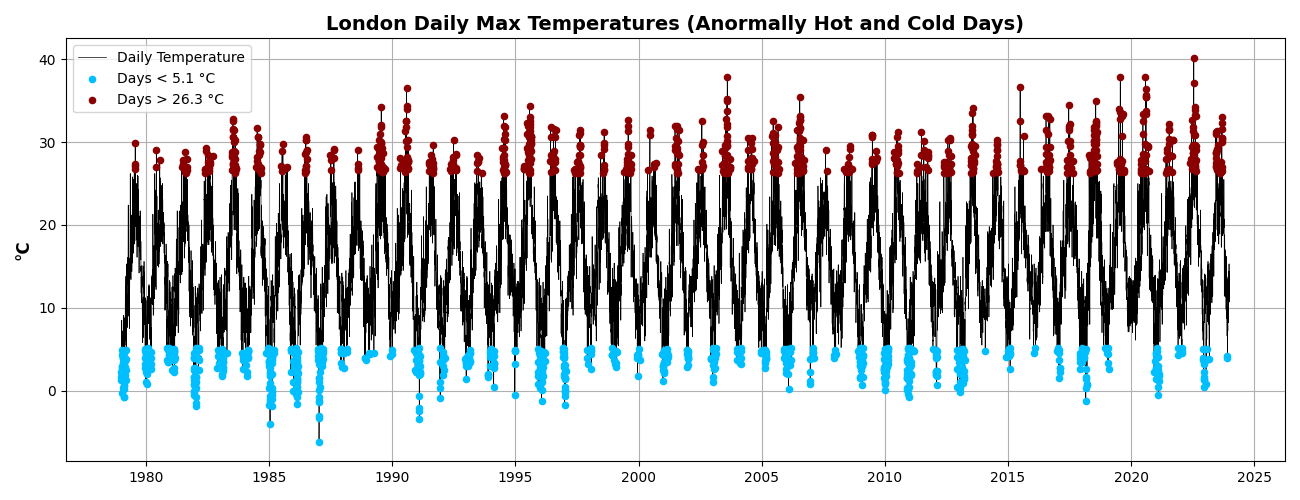

In [19]:
percentile_1_mean_temp = london_data_filtered['TX'].quantile(0.05)
percentil_99_mean_temp = london_data_filtered['TX'].quantile(0.95)

plt.figure(figsize=(13, 5))

plt.plot(london_data_filtered['TX'], color = 'black', linewidth = '0.5', label = 'Daily Temperature')

plt.scatter(london_data_filtered.index[london_data_filtered['TX'] <= percentile_1_mean_temp], london_data_filtered['TX'][london_data_filtered['TX'] <= percentile_1_mean_temp], 
            color='deepskyblue', label=f'Days < {percentile_1_mean_temp} °C', s=20, zorder=5)

plt.scatter(london_data_filtered.index[london_data_filtered['TX'] >= percentil_99_mean_temp], london_data_filtered['TX'][london_data_filtered['TX'] >= percentil_99_mean_temp], 
            color='darkred', label=f'Days > {percentil_99_mean_temp} °C', s=20, zorder=5)

plt.title('London Daily Max Temperatures (Anormally Hot and Cold Days)', fontsize=14, fontweight='bold')
plt.legend()
plt.ylabel('°C', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.grid()

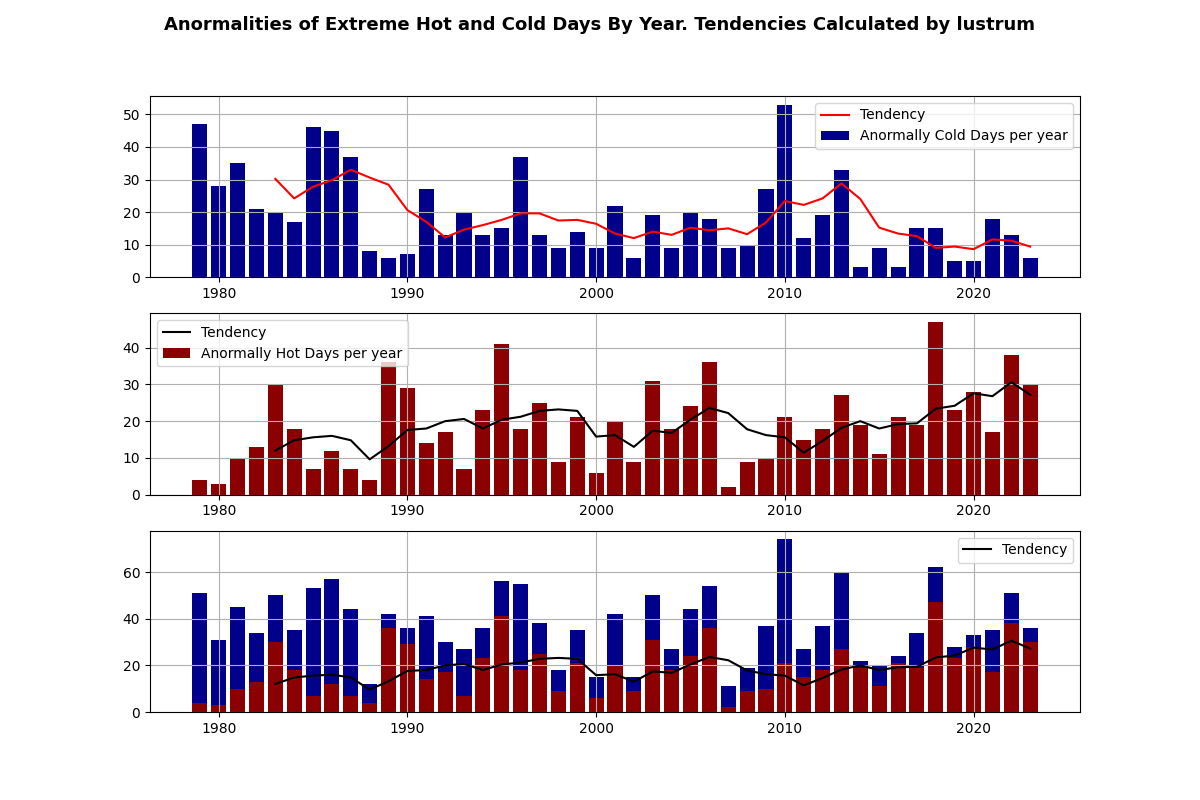

In [20]:
# Comparison between anormalities through the years
london_data_filtered['Year'] = london_data_filtered.index.year
yr_rng = range(london_data_filtered['Year'].min(), london_data_filtered['Year'].max() + 1)

cold_anormalities_by_year = london_data_filtered[london_data_filtered['TX'] <= percentile_1_mean_temp].groupby('Year').size().reindex(yr_rng, fill_value=0)
heat_anormalities_by_year = london_data_filtered[london_data_filtered['TX'] >= percentil_99_mean_temp].groupby('Year').size().reindex(yr_rng, fill_value=0)
normal_days = london_data_filtered[(london_data_filtered['TX'] > percentile_1_mean_temp) & (london_data_filtered['TX'] < percentil_99_mean_temp)].groupby('Year').size().reindex(yr_rng, fill_value=0)

tendency_cold_anormalities = cold_anormalities_by_year.rolling(window=5).mean()
tendency_heat_anormalities = heat_anormalities_by_year.rolling(window=5).mean()

fig, axes = plt.subplots(3,1, figsize=(12, 8))

plt.suptitle('Anormalities of Extreme Hot and Cold Days By Year. Tendencies Calculated by lustrum', weight = 'bold', fontsize  = 13)

plt.subplot(3,1, 1)
plt.bar(cold_anormalities_by_year.index, cold_anormalities_by_year, color="darkblue", label = "Anormally Cold Days per year")
plt.plot(tendency_cold_anormalities, color = 'red', label = 'Tendency')
plt.legend()
plt.grid()

plt.subplot(3,1, 2)
plt.bar(heat_anormalities_by_year.index, heat_anormalities_by_year, color="darkred", label = "Anormally Hot Days per year")
plt.plot(tendency_heat_anormalities, color = 'black', label = 'Tendency')
plt.legend()
plt.grid()

plt.subplot(3,1, 3)
plt.bar(heat_anormalities_by_year.index, heat_anormalities_by_year, color="darkred")
plt.bar(cold_anormalities_by_year.index, cold_anormalities_by_year, bottom = heat_anormalities_by_year, color="darkblue")
plt.plot(tendency_heat_anormalities, color = 'black', label = 'Tendency')
plt.legend()
plt.grid()
